# BIG DATA PROCESSIN PROJECT

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc, col, isnan, when, count, mean ,stddev, expr

from pyspark.sql.types import StructType, StructField, StringType, DoubleType, DateType, IntegerType

## 1. Create a SparkSession

In [2]:
spark = SparkSession.builder.appName("Spotify").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/14 15:51:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

24/11/14 15:51:44 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


# 2. Data loading and cleaning
## 2.1 Read CSV File into DataFrame

In [4]:
# Read CSV file into DataFrame with header
csv_file_path =("./data/spotify-data.csv")
df = spark.read.csv(csv_file_path,header=True)

In [5]:
# Display schema of DataFrame
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- year: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- key: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- explicit: string (nullable = true)



24/11/14 10:16:26 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


## 2.2. Read CSV File into DataFrame with my_schema

- id: str, identifier of the track.
- name: str, name of the track.
- artists: str, artists of the track.
- duration_ms: float, duration of the track in milliseconds.
- release_date: date, release date of the track.
- year: int, release year of the track.
- acousticness: float, measure of acousticness of the track.
- danceability: float, measure of danceability of the track.
- energy: float, measure of energy of the track.
- instrumentalness: float, measure of instrumental elements in the track.
- liveness: float, measure of liveness of the track.
- loudness: float, loudness of the track.
- speechiness: float, measure of speechiness in the track.
- tempo: float, tempo of the track.
- valence: float, measure of valence (positivity) of the track.
- mode: int, mode of the track (major or minor).
- key: int, key of the track.
- popularity: int, popularity score of the track.
- explicit: int, indication of explicit content presence (explicit or implicit).

In [4]:
df_schema = StructType([
    StructField("id", StringType(), True),
    StructField("name", StringType(),True),
    StructField("artists", StringType(),True),
    StructField("duration_ms", DoubleType(), True),
    StructField("release_date", StringType(),True),
    StructField("year",IntegerType(),True),
    StructField("acousticness",DoubleType(),True),
    StructField("danceability",DoubleType(),True),
    StructField("energy",DoubleType(),True),
    StructField("instrumentalness",DoubleType(),True),
    StructField("liveness",DoubleType(),True),
    StructField("loudness",DoubleType(),True),
    StructField("speechiness",DoubleType(),True),
    StructField("tempo",DoubleType(),True),
    StructField("valence",DoubleType(),True),
    StructField("mode",IntegerType(),True),
    StructField("key",IntegerType(),True),
    StructField("popularity",IntegerType(),True),
    StructField("explicit",IntegerType(),True)
])

In [5]:
# Read CSV file into DataFrame with header
csv_file_path =("./data/spotify-data.csv")
df = spark.read.csv(csv_file_path,header=True, schema=df_schema)

In [6]:
# Display schema of DataFrame
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- duration_ms: double (nullable = true)
 |-- release_date: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- key: integer (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- explicit: integer (nullable = true)



In [7]:
# Display content of df
df.show()

+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+-------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|                  id|                name|             artists|duration_ms|release_date|year|acousticness|danceability| energy|instrumentalness|liveness|loudness|speechiness|  tempo|valence|mode|key|popularity|explicit|
+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+-------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|6KbQ3uYMLKb5jDxLF...|Singende Bataillo...| ['Carl Woitschach']|   158648.0|        1928|1928|       0.995|       0.708|  0.195|           0.563|   0.151| -12.428|     0.0506|118.469|  0.779|   1| 10|         0|       0|
|6KuQTIu1KoTTkLXKr...|Fantasiestücke, O...|['Robert Schumann...|   282133.0|        1928|1928|       0.994|       0.

In [8]:
df.where(col("id") == "6TFuAErGpJ9FpxQQ1HC8nM").show()

+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|                  id|                name|             artists|duration_ms|release_date|year|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|  tempo|valence|mode|key|popularity|explicit|
+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|6TFuAErGpJ9FpxQQ1...|Invocación al Tan...|['Francisco Canar...|   167107.0|     9/16/28|1928|       0.994|       0.787| 0.156|           0.659|    0.11| -14.056|      0.157|117.167|  0.849|   0|  4|         0|       0|
+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+

# 3 Calculating basic statistics

In [ ]:
 # 3.1. Transformation of the Columna date

In [56]:
#from pyspark.sql.functions import to_date

#df = df.withColumn("release_date", to_date(col("release_date"),"dd/MM/yy"))

In [61]:
#df.where(col("id") == "6TFuAErGpJ9FpxQQ1HC8nM").show()

In [9]:
null_counts = df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns])
null_counts.show()


+---+----+-------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-----+-------+----+---+----------+--------+
| id|name|artists|duration_ms|release_date|year|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|tempo|valence|mode|key|popularity|explicit|
+---+----+-------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-----+-------+----+---+----------+--------+
|  0|   0|      0|       1447|           0| 692|         285|         138|    70|              44|      23|       8|          8|    4|      2|1438|614|       326|     187|
+---+----+-------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-----+-------+----+---+----------+--------+



#### 3.1 Row Counting and Unique Values

In [10]:
print("Rows:", df.count())
print("Col:", len(df.columns))


Rows: 169909
Col: 19


In [11]:
for col_name in df.columns:
    unique_count = df.select(col_name).distinct().count()
    print(f"Column {col_name} has {unique_count} unique")

Column id has 169909 unique
Column name has 132895 unique
Column artists has 33567 unique
Column duration_ms has 49937 unique
Column release_date has 12053 unique
Column year has 375 unique
Column acousticness has 4935 unique
Column danceability has 1413 unique
Column energy has 2412 unique
Column instrumentalness has 5443 unique
Column liveness has 2081 unique
Column loudness has 25992 unique
Column speechiness has 2506 unique
Column tempo has 85123 unique
Column valence has 2696 unique
Column mode has 5 unique
Column key has 13 unique
Column popularity has 102 unique
Column explicit has 71 unique


## 3.2 Descriptive Statistics


In [12]:
df.describe().show()

24/11/14 15:54:06 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
[Stage 124:================================================>        (6 + 1) / 7]

+-------+--------------------+----------------------------+--------------------+------------------+--------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+-----------------+-------------------+
|summary|                  id|                        name|             artists|       duration_ms|        release_date|              year|     acousticness|      danceability|            energy| instrumentalness|          liveness|          loudness|      speechiness|            tempo|           valence|              mode|              key|       popularity|           explicit|
+-------+--------------------+----------------------------+--------------------+------------------+--------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+----

# 4. Data cleaning

## 4.1 Clean and Standardize release_date
### 4.1.1 Extract day and month of "date_format"

In [13]:
from pyspark.sql.functions import regexp_extract, col, to_date, when
from pyspark.sql import functions as F

In [138]:
#df = df.withColumn("year_only", regexp_extract(col("release_date"),"^(\\d{4})$",1))
#df = df.withColumn("date_format", regexp_extract(col("release_date"),"^(\\d{1,2})/(\\d{1,2})/(\\d{2})$",0))

In [14]:
df = df.withColumn("month", F.split("release_date","/")[0].cast("int"))
df = df.withColumn("day", F.split("release_date","/")[1].cast("int"))

In [15]:
df.select("release_date","year","day","month").show()

+------------+----+----+-----+
|release_date|year| day|month|
+------------+----+----+-----+
|        1928|1928|NULL| 1928|
|        1928|1928|NULL| 1928|
|        1928|1928|NULL| 1928|
|     9/25/28|1928|  25|    9|
|        1928|1928|NULL| 1928|
|        1928|1928|NULL| 1928|
|        1928|1928|NULL| 1928|
|        1928|1928|NULL| 1928|
|     10/3/28|1928|   3|   10|
|        1928|1928|NULL| 1928|
|        1928|1928|NULL| 1928|
|        1928|1928|NULL| 1928|
|        1928|1928|NULL| 1928|
|        1928|1928|NULL| 1928|
|      1/1/28|1928|   1|    1|
|        1928|1928|NULL| 1928|
|        1928|1928|NULL| 1928|
|     9/16/28|1928|  16|    9|
|        1928|1928|NULL| 1928|
|     9/17/28|1928|  17|    9|
+------------+----+----+-----+
only showing top 20 rows



### 4.1.2 Combine year,day, month

In [16]:
df = df.withColumn("date_combined",
                   F.expr("make_date(year, month,day)"))

In [17]:
df.select("release_date","year","day","month","date_combined").show()

+------------+----+----+-----+-------------+
|release_date|year| day|month|date_combined|
+------------+----+----+-----+-------------+
|        1928|1928|NULL| 1928|         NULL|
|        1928|1928|NULL| 1928|         NULL|
|        1928|1928|NULL| 1928|         NULL|
|     9/25/28|1928|  25|    9|   1928-09-25|
|        1928|1928|NULL| 1928|         NULL|
|        1928|1928|NULL| 1928|         NULL|
|        1928|1928|NULL| 1928|         NULL|
|        1928|1928|NULL| 1928|         NULL|
|     10/3/28|1928|   3|   10|   1928-10-03|
|        1928|1928|NULL| 1928|         NULL|
|        1928|1928|NULL| 1928|         NULL|
|        1928|1928|NULL| 1928|         NULL|
|        1928|1928|NULL| 1928|         NULL|
|        1928|1928|NULL| 1928|         NULL|
|      1/1/28|1928|   1|    1|   1928-01-01|
|        1928|1928|NULL| 1928|         NULL|
|        1928|1928|NULL| 1928|         NULL|
|     9/16/28|1928|  16|    9|   1928-09-16|
|        1928|1928|NULL| 1928|         NULL|
|     9/17

### 4.2.3 Convert `date_combined` to yyyy-MM-dd format 

In [18]:
df = df.withColumn("formatted_date",F.date_format("date_combined","yyyy-MM-dd"))

In [19]:
df.select("release_date","year","day","month","date_combined","formatted_date").show()

+------------+----+----+-----+-------------+--------------+
|release_date|year| day|month|date_combined|formatted_date|
+------------+----+----+-----+-------------+--------------+
|        1928|1928|NULL| 1928|         NULL|          NULL|
|        1928|1928|NULL| 1928|         NULL|          NULL|
|        1928|1928|NULL| 1928|         NULL|          NULL|
|     9/25/28|1928|  25|    9|   1928-09-25|    1928-09-25|
|        1928|1928|NULL| 1928|         NULL|          NULL|
|        1928|1928|NULL| 1928|         NULL|          NULL|
|        1928|1928|NULL| 1928|         NULL|          NULL|
|        1928|1928|NULL| 1928|         NULL|          NULL|
|     10/3/28|1928|   3|   10|   1928-10-03|    1928-10-03|
|        1928|1928|NULL| 1928|         NULL|          NULL|
|        1928|1928|NULL| 1928|         NULL|          NULL|
|        1928|1928|NULL| 1928|         NULL|          NULL|
|        1928|1928|NULL| 1928|         NULL|          NULL|
|        1928|1928|NULL| 1928|         N

In [20]:
df = df.drop("month", "day", "date_combined")

In [21]:
df = df.withColumn("formatted_date",
                   F.when(F.col("formatted_date").isNull(),
                          F.concat(F.col("year").cast("string"),F.lit("-01-01")))
                   .otherwise(F.col("formatted_date")))

In [22]:
df.select("release_date", "year", "formatted_date").show()

+------------+----+--------------+
|release_date|year|formatted_date|
+------------+----+--------------+
|        1928|1928|    1928-01-01|
|        1928|1928|    1928-01-01|
|        1928|1928|    1928-01-01|
|     9/25/28|1928|    1928-09-25|
|        1928|1928|    1928-01-01|
|        1928|1928|    1928-01-01|
|        1928|1928|    1928-01-01|
|        1928|1928|    1928-01-01|
|     10/3/28|1928|    1928-10-03|
|        1928|1928|    1928-01-01|
|        1928|1928|    1928-01-01|
|        1928|1928|    1928-01-01|
|        1928|1928|    1928-01-01|
|        1928|1928|    1928-01-01|
|      1/1/28|1928|    1928-01-01|
|        1928|1928|    1928-01-01|
|        1928|1928|    1928-01-01|
|     9/16/28|1928|    1928-09-16|
|        1928|1928|    1928-01-01|
|     9/17/28|1928|    1928-09-17|
+------------+----+--------------+
only showing top 20 rows



In [23]:
df = df.drop("release_date","year")

## 4.3 Null value analysis

In [24]:
null_counts = df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns])
null_counts.show()

+---+----+-------+-----------+------------+------------+------+----------------+--------+--------+-----------+-----+-------+----+---+----------+--------+--------------+
| id|name|artists|duration_ms|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|tempo|valence|mode|key|popularity|explicit|formatted_date|
+---+----+-------+-----------+------------+------------+------+----------------+--------+--------+-----------+-----+-------+----+---+----------+--------+--------------+
|  0|   0|      0|       1447|         285|         138|    70|              44|      23|       8|          8|    4|      2|1438|614|       326|     187|           692|
+---+----+-------+-----------+------------+------------+------+----------------+--------+--------+-----------+-----+-------+----+---+----------+--------+--------------+



In [25]:
df = df.dropna(subset=["acousticness","energy","tempo","valence","popularity","explicit","formatted_date","mode","key","duration_ms"])

In [26]:
df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns]).show()

+---+----+-------+-----------+------------+------------+------+----------------+--------+--------+-----------+-----+-------+----+---+----------+--------+--------------+
| id|name|artists|duration_ms|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|tempo|valence|mode|key|popularity|explicit|formatted_date|
+---+----+-------+-----------+------------+------------+------+----------------+--------+--------+-----------+-----+-------+----+---+----------+--------+--------------+
|  0|   0|      0|          0|           0|           0|     0|               0|       0|       0|          0|    0|      0|   0|  0|         0|       0|             0|
+---+----+-------+-----------+------------+------------+------+----------------+--------+--------+-----------+-----+-------+----+---+----------+--------+--------------+



In [27]:
print("Rows:", df.count())
print("Col:", len(df.columns))

Rows: 168462
Col: 18


## 4.4. Remove Irrelevant Columns

In [28]:
df = df.drop("id")

In [90]:
df.write.csv("./data/spotify_cleaned.csv",header=True)

# 5 Exploratory Data Analysis (EDA)

## 5.1 Descriptive Statistics

In [29]:
df.select("duration_ms","acousticness","danceability","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence","mode","key","popularity","explicit").describe().show()

+-------+------------------+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+
|summary|       duration_ms|      acousticness|       danceability|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|               mode|               key|        popularity|           explicit|
+-------+------------------+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+
|  count|            168462|            168462|             168462|            168462|             168462|             168462|             168462|     

## 5.2 Data Visualization with Matplotlib and Seaborn

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df_pandas = df.toPandas()

### 5.2.1 Distribution of Popularity

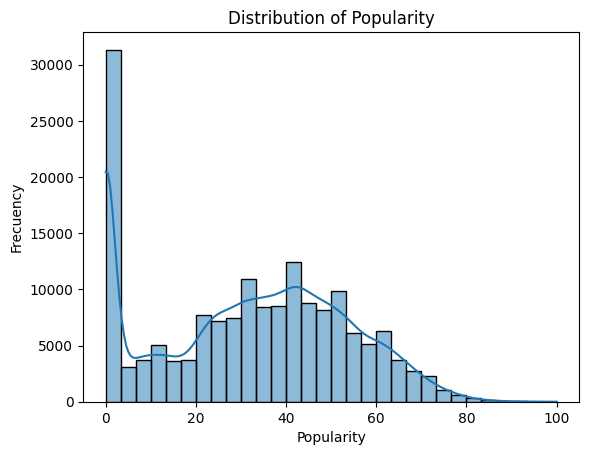

In [36]:
sns.histplot(df_pandas['popularity'], kde=True, bins=30)
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frecuency")
plt.show()

### 5.2.2 Relation between popularity and duration

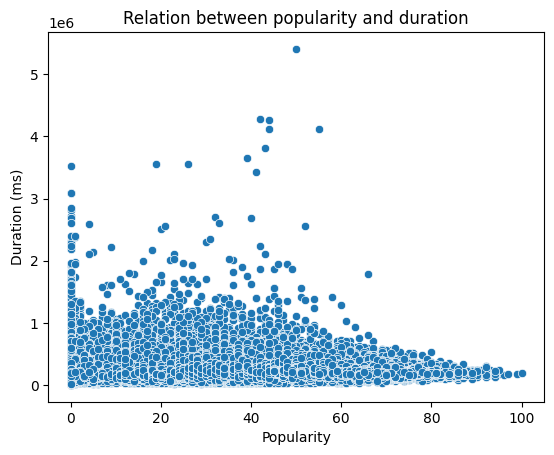

In [37]:
sns.scatterplot(x="popularity",y="duration_ms", data=df_pandas)
plt.title("Relation between popularity and duration")
plt.xlabel("Popularity")
plt.ylabel("Duration (ms)")
plt.show()

### 5.2.3 Correlation Map


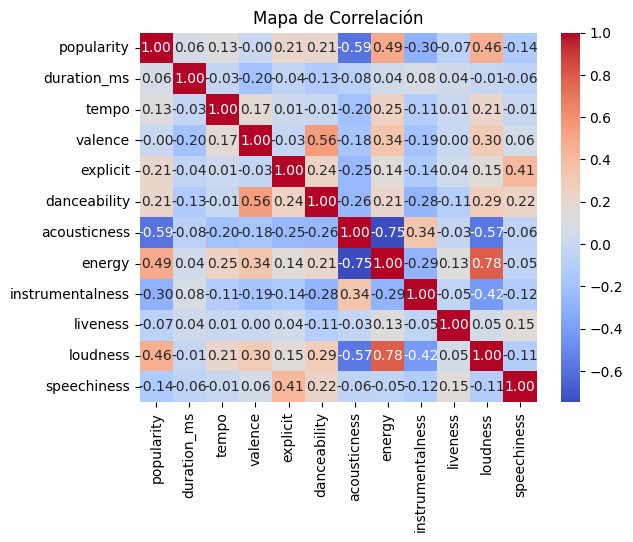

In [38]:

correlation_matrix = df_pandas[['popularity', 'duration_ms', 'tempo', 'valence',"explicit","danceability","acousticness","energy","instrumentalness","liveness","loudness", "speechiness"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlación')
plt.show()

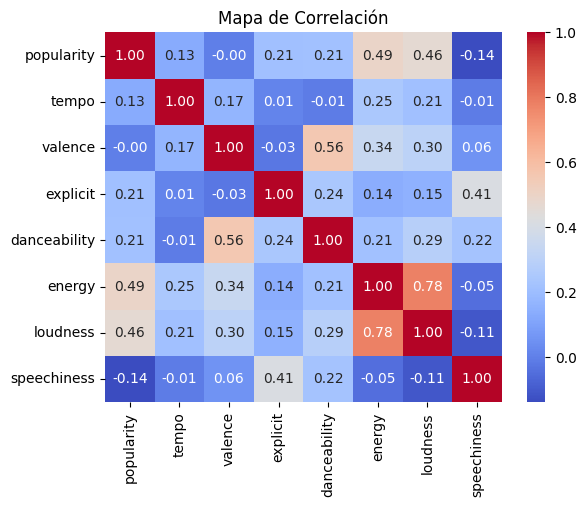

In [39]:
correlation_matrix = df_pandas[['popularity', 'tempo', 'valence',"explicit","danceability","energy","loudness", "speechiness"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlación')
plt.show()

In [40]:
df_pandas['danceability'].corr(df_pandas['valence'])

np.float64(0.5557669663482309)

# 6 Engineering Characteristics 
## 6.1 Creation of New Variables Based on Categories
- Classify Tempo: Divide the tempo into categories such as slow, moderate and fast.
- Classify Duration: Group songs by duration, such as short, medium or long.


In [45]:
df = df.withColumn("tempo_category",when(df["tempo"]<90, "lento")
                    .when((df["tempo"]>=90) & (df["tempo"]<120), "moderato")
                    .otherwise("presto"))

In [50]:
df = df.withColumn("duration_category", when(df["duration_ms"] < 180000, "short")
                   .when((df["duration_ms"] >=180000) & (df["duration_ms"] < 300000),"medium")
                    .otherwise("long"))

In [51]:
df.show(5)

+--------------------+--------------------+-----------+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+--------------+--------------+-----------------+
|                name|             artists|duration_ms|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|  tempo|valence|mode|key|popularity|explicit|formatted_date|tempo_category|duration_category|
+--------------------+--------------------+-----------+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+--------------+--------------+-----------------+
|Singende Bataillo...| ['Carl Woitschach']|   158648.0|       0.995|       0.708| 0.195|           0.563|   0.151| -12.428|     0.0506|118.469|  0.779|   1| 10|         0|       0|    1928-01-01|      moderato|            short|
|Fantasiestücke, O...|['Robert Schumann...|   282133.0|       0.994|       0.379|0.0

In [52]:
df.select("tempo", "tempo_category", "duration_ms", "duration_category").show(5)

+-------+--------------+-----------+-----------------+
|  tempo|tempo_category|duration_ms|duration_category|
+-------+--------------+-----------+-----------------+
|118.469|      moderato|   158648.0|            short|
| 83.972|         lento|   282133.0|           medium|
|107.177|      moderato|   104300.0|            short|
|108.003|      moderato|   180760.0|           medium|
| 62.149|         lento|   687733.0|             long|
+-------+--------------+-----------+-----------------+
only showing top 5 rows



## 6.2 Scaling and Normalization of Numerical Characteristics

In [72]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler, StandardScaler
from pyspark.ml.stat import Correlation

### 6.2.1 Scaling

In [68]:
input_cols = ["popularity","energy","loudness"]
assembler = VectorAssembler(inputCols = input_cols, outputCol="features")

In [69]:
df_vector = assembler.transform(df)

In [71]:
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(df_vector)
df_scaled = scaler_model.transform(df_vector)
df_scaled.select("features","scaled_features").show(5,truncate=False)

+--------------------+--------------------------------+
|features            |scaled_features                 |
+--------------------+--------------------------------+
|[0.0,0.195,-12.428] |[0.0,0.195,0.7450003915120196]  |
|[0.0,0.0135,-28.454]|[0.0,0.0135,0.49402552658366616]|
|[0.0,0.22,-19.924]  |[0.0,0.22,0.6276094276094277]   |
|[0.0,0.13,-14.734]  |[0.0,0.13,0.7088873228408112]   |
|[1.0,0.204,-16.829] |[0.01,0.204,0.6760786156134994] |
+--------------------+--------------------------------+
only showing top 5 rows



### 6.2.2 Normalization

In [75]:
scaler_standard = StandardScaler(inputCol="features", outputCol="scaled_features_standard",withStd=True,withMean=True)
scaler_model_standard = scaler_standard.fit(df_vector)
df_normalized = scaler_model_standard.transform(df_vector)
df_normalized.select("features","scaled_features_standard").show(5,truncate=False)

+--------------------+--------------------------------------------------------------+
|features            |scaled_features_standard                                      |
+--------------------+--------------------------------------------------------------+
|[0.0,0.195,-12.428] |[-1.4742336353853223,-1.1070537082061627,-0.19507730886430277]|
|[0.0,0.0135,-28.454]|[-1.4742336353853223,-1.7867895512467682,-3.035292179839206]  |
|[0.0,0.22,-19.924]  |[-1.4742336353853223,-1.0134261816165477,-1.5235591928545604] |
|[0.0,0.13,-14.734]  |[-1.4742336353853223,-1.350485277339162,-0.603759169120644]   |
|[1.0,0.204,-16.829] |[-1.4277763645994614,-1.0733477986339015,-0.9750464619380921] |
+--------------------+--------------------------------------------------------------+
only showing top 5 rows



## 7. Predictive Model
### 7.1 Clustering with K-Means

In [79]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator


In [87]:
kmeans = KMeans(featuresCol="scaled_features",k=5)
model = kmeans.fit(df_scaled)

In [88]:
clustered_data = model.transform(df_scaled)
clustered_data.select("scaled_features","prediction").show(10)

+--------------------+----------+
|     scaled_features|prediction|
+--------------------+----------+
|[0.0,0.195,0.7450...|         2|
|[0.0,0.0135,0.494...|         2|
|[0.0,0.22,0.62760...|         2|
|[0.0,0.13,0.70888...|         2|
|[0.01,0.204,0.676...|         2|
|[0.0,0.12,0.63828...|         2|
|[0.0,0.197,0.6698...|         2|
|[0.0,0.421,0.7849...|         2|
|[0.0,0.207,0.7861...|         2|
|[0.0,0.205,0.6245...|         2|
+--------------------+----------+
only showing top 10 rows



In [89]:
evaluator = ClusteringEvaluator(featuresCol="scaled_features")
silhouette_score = evaluator.evaluate(clustered_data)
print(f"Silhouette Score: {silhouette_score}")

Silhouette Score: 0.5255450681927872


In [91]:
spark.stop()